## CASA0002_Urban simulation

# Underground Commuters Practical

An_snia Godoy-Lorite, Elsa Arcaute

March 2021

This practical will show you how to create Commuting flows network, in this case for commuter in the London tube, and analyse these flows in terms of centrality and disruptions.

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

First, we are going to read the underground network presented in previous practicals. This is going to be the underlying network used by commuters:

In [23]:
#we are going to read the tube network from the shape file
#first, check current directory
os.getcwd()

'/home/jovyan/work/simulation/week10/TubeCommuters_Practical'

In [24]:
# You need to set the working directory to where you have your shapefile data
os.chdir('/home/jovyan/work/simulation/week10/TubeCommuters_Practical/underground')

# Let's create a graph from the shapefile
g_shp=nx.read_shp('underground.shp',geom_attrs=False)

# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(g_shp)
df[0:10]

,source,target,station_1_,station_1,ShpName,station_2,toid_seq,station_2_,distance
0,"(-0.1571, 51.5226)","(-0.1631, 51.5225)",Baker Street,11,underground,163,1,Marylebone,416.586050
1,"(-0.1571, 51.5226)","(-0.1466, 51.5234)",Baker Street,11,underground,212,2,Regent's Park,734.173636
2,"(-0.1571, 51.5226)","(-0.17, 51.5203)",Baker Street,11,underground,83,171,Edgware Road (C),931.211577
3,"(-0.1571, 51.5226)","(-0.1439, 51.5238)",Baker Street,11,underground,104,225,Great Portland Street,925.826411
4,"(-0.1571, 51.5226)","(-0.1494, 51.5142)",Baker Street,11,underground,28,197,Bond Street,1076.607648
5,"(-0.1571, 51.5226)","(-0.174, 51.5347)",Baker Street,11,underground,249,198,St. John's Wood,1785.442777
6,"(-0.1571, 51.5226)","(-0.1803, 51.5472)",Baker Street,11,underground,94,226,Finchley Road,3175.274183
7,"(-0.1247, 51.508)","(-0.1223, 51.5074)",Charing Cross,49,underground,87,277,Embankment,179.503418
8,"(-0.1247, 51.508)","(-0.1342, 51.5098)",Charing Cross,49,underground,197,4,Picadilly Circus,689.289845
9,"(-0.1247, 51.508)","(-0.1281, 51.5113)",Charing Cross,49,underground,151,278,Leicester Square,436.484594


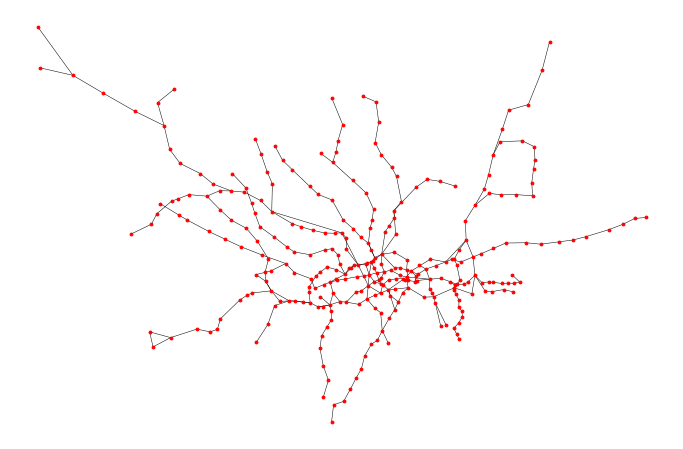

In [25]:
# Let's plot the tube network:

# first we need to extract the coordinates from every node:
pos = {xy: xy for xy in g_shp.nodes()}

fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
plt.axis("off")
plt.savefig('TO.png', dpi=150, transparent=True)
plt.show()

In [26]:
#Now, let's check attributes of edges and nodes:
#edges:
list(g_shp.edges(data = True))[0]

((-0.1571, 51.5226),
 (-0.1631, 51.5225),
 {'toid_seq': '1',
  'station_1': 11,
  'station_1_': 'Baker Street',
  'station_2': 163,
  'station_2_': 'Marylebone',
  'distance': 416.586050414,
  'ShpName': 'underground'})

In [27]:
#nodes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {}),
 ((-0.1631, 51.5225), {}),
 ((-0.1466, 51.5234), {}),
 ((-0.1247, 51.508), {}),
 ((-0.1223, 51.5074), {}),
 ((-0.1342, 51.5098), {}),
 ((-0.1679, 51.5199), {}),
 ((-0.1755, 51.5154), {}),
 ((-0.1001, 51.4943), {}),
 ((-0.1115, 51.4991), {})]

In [28]:
#we will need to add station names as attributes of the nodes:
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
#nod_all = {**nod_st1, **nod_st2} #for python 3.5 and greater

#In Python 2, (or 3.4 or lower) write a function
nod_all = nod_st1.copy()   # start with x's keys and values
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# get the nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {'station': 'Baker Street'}),
 ((-0.1631, 51.5225), {'station': 'Marylebone'}),
 ((-0.1466, 51.5234), {'station': "Regent's Park"}),
 ((-0.1247, 51.508), {'station': 'Charing Cross'}),
 ((-0.1223, 51.5074), {'station': 'Embankment'}),
 ((-0.1342, 51.5098), {'station': 'Picadilly Circus'}),
 ((-0.1679, 51.5199), {'station': 'Edgware Road (B)'}),
 ((-0.1755, 51.5154), {'station': 'Paddington'}),
 ((-0.1001, 51.4943), {'station': 'Elephant & Castle'}),
 ((-0.1115, 51.4991), {'station': 'Lambeth North'})]

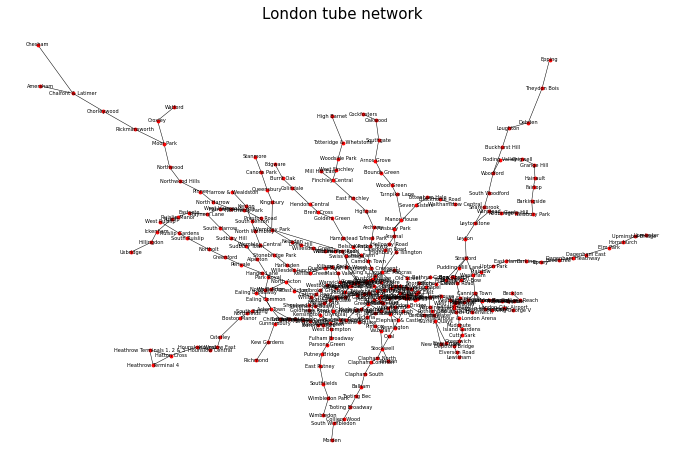

In [29]:
#We can plot the underground network with stations names:
fig, ax = plt.subplots(figsize=(12,8))

node_labels = nx.get_node_attributes(g_shp, 'station')

pos = {xy: xy for xy in g_shp.nodes()}

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
nx.draw_networkx_labels(g_shp,pos, node_labels, font_size=5,font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [30]:
#do we want this graph to be a directed one? In fact, only a few links in the dataset are directed

# We can transform the type of graph from directed to undirected using the following function:
g_shp_un = g_shp.to_undirected()

#Finally, we will give an ID to each node(station), such that it will be easier later to call them:
#1.Create a new attribute with node coordinates (now coord are the keys and we do not want to lose that information
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')
list(g_shp_un.nodes(data=True))[0:10]


[((-0.1571, 51.5226),
  {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 ((-0.1631, 51.5225),
  {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 ((-0.1466, 51.5234),
  {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 ((-0.1247, 51.508),
  {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 ((-0.1223, 51.5074),
  {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 ((-0.1342, 51.5098),
  {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 ((-0.1679, 51.5199),
  {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 ((-0.1755, 51.5154),
  {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 ((-0.1001, 51.4943),
  {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 ((-0.1115, 51.4991),
  {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

In [31]:
#2.now relabel each node with an ordered integer:
node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)
#list(g_shp_un.nodes(data=True))[0:10]

In [32]:
#Later when using the Commuters data we will have an issue mapping node 'Heathrow Terminals 1, 2 & 3', 
#so we are going to rename it here:
#1. find the node 'Heathrow Terminals 1, 2 & 3'
nodes = [(x,y) for x,y in g_shp_un.nodes(data='station') if 'Heathrow' in str(y)]
nodes

[(258, 'Heathrow Terminals 1, 2 & 3'), (259, 'Heathrow Terminal 4')]

In [33]:
#2.Rename it with the name given by the the commuters file (see later):
g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

In [34]:
list(g_shp_un.edges(data=True))[0:10]

[(0,
  1,
  {'toid_seq': '1',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 163,
   'station_2_': 'Marylebone',
   'distance': 416.586050414,
   'ShpName': 'underground'}),
 (0,
  2,
  {'toid_seq': '2',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 212,
   'station_2_': "Regent's Park",
   'distance': 734.173636158,
   'ShpName': 'underground'}),
 (0,
  75,
  {'toid_seq': '171',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 83,
   'station_2_': 'Edgware Road (C)',
   'distance': 931.21157741,
   'ShpName': 'underground'}),
 (0,
  76,
  {'toid_seq': '225',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 104,
   'station_2_': 'Great Portland Street',
   'distance': 925.82641098,
   'ShpName': 'underground'}),
 (0,
  33,
  {'toid_seq': '197',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 28,
   'station_2_': 'Bond Street',
   'distance': 1076.607648078,
   'ShpName': 'undergrou

## PART 1

### 1.1 DEGREE

#### DEGREE NO WEIGHT

In [35]:
#If we want to consider the weight of a link into the degree, we need to calculate the node strength:
degree=nx.degree(g_shp_un)
nx.set_node_attributes(g_shp_un,dict(degree),'degree') 
list(g_shp_un.nodes(data=True))[:2]


[(0,
  {'station': 'Baker Street',
   'station_coord': (-0.1571, 51.5226),
   'degree': 7}),
 (1,
  {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225), 'degree': 2})]

In [39]:
degree_v=nx.degree(g_shp_un,weight='distance')
nx.set_node_attributes(g_shp_un,dict(degree_v),'degree_v') 
list(g_shp_un.nodes(data=True))[:2]

[(0,
  {'station': 'Baker Street',
   'station_coord': (-0.1571, 51.5226),
   'degree': 7,
   'degree_v': 9045.122283432}),
 (1,
  {'station': 'Marylebone',
   'station_coord': (-0.1631, 51.5225),
   'degree': 2,
   'degree_v': 857.8041545460001})]

In [40]:
degreelist=[(i[1]['degree']) for i in g_shp_un.nodes(data=True)] 
degreelist[:5]

[7, 2, 2, 3, 4]

In [41]:
maxdegree=np.max(degreelist)
print(maxdegree)
mindegree=np.min(degreelist)
print(mindegree)

7
1


In [42]:
#Using the degree we already computed at each node,
# we are going to figure out the probability of each degree in both graphs:

# Probability of degrees in the Erdős-Rényi graph:
# this give us the k values. It selects the unique values of the degrees in the graph
degree_values = sorted(set(degreelist))

# this give us the p(k) values
probability = [round(list(degreelist).count(i)/float(nx.number_of_nodes(g_shp_un)),4) for i in degree_values] 

In [43]:
degree_values

[1, 2, 3, 4, 5, 6, 7]

In [44]:
probability

[0.085, 0.7157, 0.0752, 0.085, 0.0163, 0.0163, 0.0065]

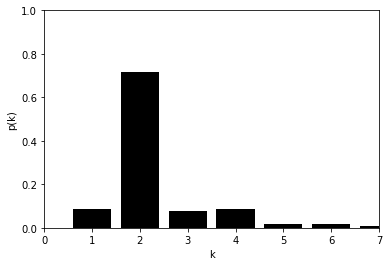

In [215]:
import matplotlib.pyplot as plt
plt.bar(degree_values,probability,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.ylim(0.00, 1)
plt.xlim(0, 7)

#for a,b in zip(degree_values,probability):
    #plt.text(a,b+0.1,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=7)
plt.savefig('degree_distribution.png', dpi=150, transparent=True)
plt.show()


### 1.2 diameter

In [53]:
d_noweight = nx.diameter(g_shp_un)
d_noweight

38

In [54]:
# diameter of the network considering the distance between stations (weighted diameter)

nlen = {n:nx.single_source_dijkstra_path_length(g_shp_un, n, weight='distance') for n in g_shp_un.nodes() }
e = nx.eccentricity(g_shp_un,sp=nlen)
d = nx.diameter(g_shp_un, e)
d

71491.11880904001

### 1.3 Average Path Length

In [55]:
nlen = {n:nx.single_source_dijkstra_path_length(g_shp_un, n, weight='distance')   for n in g_shp_un.nodes() }

In [56]:
average_path=nx.average_shortest_path_length(g_shp_un)
#average_path_weight=nx.average_shortest_path_length(g_shp_un, weight='distance')
average_path

14.12664738026358

In [57]:
average_path_weight=nx.average_shortest_path_length(g_shp_un, weight='distance')
average_path_weight

18447.986496254973

In [107]:
#?nx.average_shortest_path_length

#Signature: nx.average_shortest_path_length(G, weight=None, method=None)
#Docstring:
#Returns the average shortest path length.

#The average shortest path length is

#.. math::

 #  a =\sum_{s,t \in V} \frac{d(s, t)}{n(n-1)}

#where `V` is the set of nodes in `G`,
#`d(s, t)` is the shortest path from `s` to `t`,
#and `n` is the number of nodes in `G`.

#Parameters
#----------
#G : NetworkX graph

#weight : None or string, optional (default = None)
   #If None, every edge has weight/distance/cost 1.
   #If a string, use this edge attribute as the edge weight.
  # Any edge attribute not present defaults to 1.

#method : string, optional (default = 'unweighted' or 'djikstra')
   # The algorithm to use to compute the path lengths.
    #Supported options are 'unweighted', 'dijkstra', 'bellman-ford',
  #  'floyd-warshall' and 'floyd-warshall-numpy'.
  #  Other method values produce a ValueError.
   # The default method is 'unweighted' if `weight` is None,
   # otherwise the default method is 'dijkstra'.

### 1.4 Remove———非顺序

#### Centrality measures

Let's explore the commuting flows network with some exercises on different type of centrality measures and disruptions on the network. Keep in mind that this network is a directed network and nodes and edges centrality depends on the direction of the flows.

ValueError: s must be a scalar, or the same size as x and y

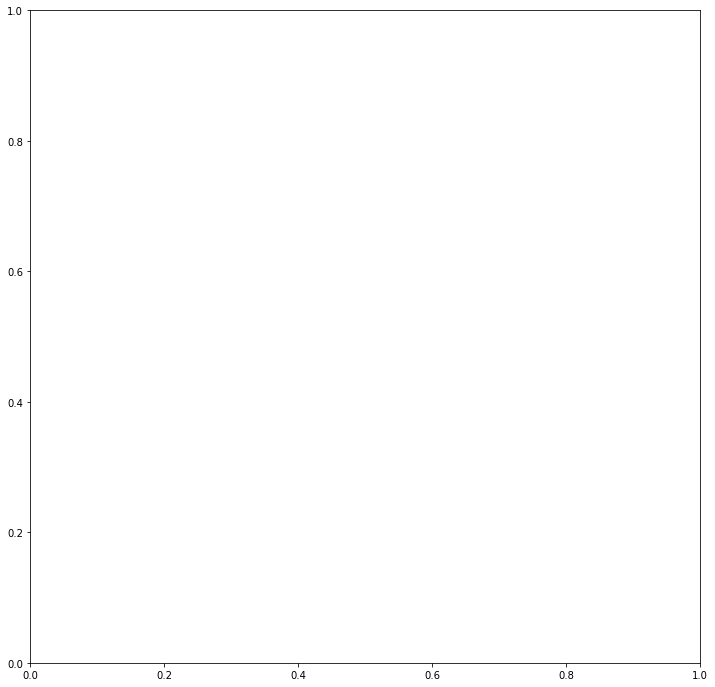

In [232]:
#Let's compare node centrality for the undirected tube network and the directed commuting flows network:
#Let us compute the betweenness centrality for the undirected tube network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(g_shp_un, weight='distance',normalized=True)
# We can add these values as node attributes:
#nx.set_node_attributes(g_shp_un,bet_london_w,'betweenness_dis')

# Lets set colour and size of nodes according to betweenness values
#betweenness_w_values=[(i[1]['degree']) for i in g_shp_un.nodes(data=True)]

bet_w_color=[(i[1]['degree']/7) for i in g_shp_un.nodes(data=True)]
bet_w_size=[(i[1]['degree']/7*100) for i in g_shp_un.nodes(data=True)]


# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos= pos,
        node_color= g_shp_un.nodes(data='degree'),
        node_size= g_shp_un.nodes(data='degree'))

plt.colorbar(nod,label="degree",orientation="horizontal",shrink=0.5)
plt.axis("off")
#plt.title("London Underground network",fontsize=15)
plt.savefig('London Underground network.png', dpi=300, transparent=True)
plt.show()

In [230]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_un=dict(g_shp_un.nodes(data=True))

#Python2:
#import operator
#listbet_un=sorted(dict_bet_un.items(), key=operator.itemgetter(1),reverse=True)
#listbet_un[:10]

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_dis'],reverse=True))
list(listbet_un.items())[:5]

[(0,
  {'station': 'Baker Street',
   'station_coord': (-0.1571, 51.5226),
   'degree': 7,
   'degree_v': 9045.122283432,
   'betweenness_dis': 0.2845987920621225}),
 (25,
  {'station': 'Bank',
   'station_coord': (-0.0886, 51.5133),
   'degree': 6,
   'degree_v': 7144.910276061,
   'betweenness_dis': 0.25032355478861085}),
 (24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'degree': 6,
   'degree_v': 5100.083793721,
   'betweenness_dis': 0.2339732528041415}),
 (88,
  {'station': "King's Cross St. Pancras",
   'station_coord': (-0.1238, 51.5308),
   'degree': 7,
   'degree_v': 9738.569786887,
   'betweenness_dis': 0.2328300258843831}),
 (33,
  {'station': 'Bond Street',
   'station_coord': (-0.1494, 51.5142),
   'degree': 4,
   'degree_v': 3226.288114466,
   'betweenness_dis': 0.20701035375323554})]

In [62]:
import pandas as pd
nodescsv=pd.DataFrame([i[1] for i in g_shp_un.nodes(data=True)], index=[i[0] for i in g_shp_un.nodes(data=True)])
nodescsv[25:26]


,station,station_coord,degree,degree_v,betweenness_dis
25,Bank,"(-0.0886, 51.5133)",6,7144.910276,0.250324


### for test

In [249]:
g_unseque_bew=g_shp_un.copy(as_view=False)

In [250]:
def averageshortestpathlength_dis(G1):
    tempgraph1=G1.copy(as_view=False);
    if nx.is_connected(tempgraph1):
    # Normal case, the graph is connected
        average1=nx.average_shortest_path_length(tempgraph1,weight='distance')
        return average1;
       
    else:
        for C in (tempgraph1.subgraph(c).copy() for c in nx.connected_components(tempgraph1)):
            average1=0
            average1= average1+nx.average_shortest_path_length(C,weight='distance')
            i=nx.number_connected_components(tempgraph1)
            i=i-1
            if i == 0:
                average1=average1/len(C)
            return average1;
        
def averageshortestpathlength(G1):
    tempgraph1=G1.copy(as_view=False);
    if nx.is_connected(tempgraph1):
    # Normal case, the graph is connected
        average1=nx.average_shortest_path_length(tempgraph1)
        return average1;
       
    else:
        for C in (tempgraph1.subgraph(c).copy() for c in nx.connected_components(tempgraph1)):
            average1=0
            average1= average1+nx.average_shortest_path_length(C)
            i=nx.number_connected_components(tempgraph1)
            i=i-1
            if i == 0:
                average1=average1/len(C)
            return average1;

In [251]:
        
def averagedegree(G1):
    tempgraph1=G1.copy(as_view=False);
    if nx.is_connected(tempgraph1):
    # Normal case, the graph is connected
        average1=nx.degree(tempgraph1)
        return average1;
       
    else:
        for C in (tempgraph1.subgraph(c).copy() for c in nx.connected_components(tempgraph1)):
            average1=0
            average1= average1+nx.nx.degree(C)
            i=nx.number_connected_components(tempgraph1)
            i=i-1
            if i == 0:
                average1=average1/len(C)
            return average1;

In [252]:
#?nx.average_shortest_path_length

In [253]:
average_path = averageshortestpathlength_dis(g_unseque_bew)
print(average_path)

18447.986496254973


In [254]:
#averagedegree(g_unseque_bew)

In [255]:
import pandas as pd
Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result1.loc[0]=['original state',0,'unseque_bew',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result1

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
0,original state,0,unseque_bew,1,2.3072,14.126647,18447.986496,0.032353,0.05401


In [256]:
#To remove nodes: 

#If we want to remove the node with the max value of betweenness centrality:
for k in range(1,51):
    betweenness_w_values=[(i[1]['betweenness_dis']) for i in g_unseque_bew.nodes(data=True)]
    maxbet=[n for n in g_unseque_bew.nodes() if g_unseque_bew.nodes[n]['betweenness_dis'] == max(betweenness_w_values)]
    if len(maxbet) != 1:
        for i in maxbet: 
            maxbet=[i]
    #######remove#################
    l1=list(g_unseque_bew.nodes)
    g_unseque_bew.remove_nodes_from(maxbet)
    l2=list(g_unseque_bew.nodes)
    c = nx.clustering(g_unseque_bew)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result1.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result1.loc[k,'c_global']=nx.transitivity(g_unseque_bew)
    Result1.loc[k,'stationremoved']= set(l1) - set(l2)
    Result1.loc[k,'step_k']= k
    Result1.loc[k,'strategy']= 'unseque_bew'
    Result1.loc[k,'components']= nx.number_connected_components(g_unseque_bew)
    Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_unseque_bew)
    Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_unseque_bew)
    #Result.loc[k,'degree']= nx.degree(g_unseque_bew)
    k=k+1

In [257]:
Result1

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
0,original state,0,unseque_bew,1,2.3072,14.126647,18447.986496,0.032353,0.054010
1,0,1,unseque_bew,1,NaN,16.949720,20970.696863,0.033005,0.056995
2,25,2,unseque_bew,1,NaN,17.737081,21191.518535,0.032127,0.055147
3,24,3,unseque_bew,2,NaN,18.335086,21459.398421,0.030253,0.046693
4,88,4,unseque_bew,4,NaN,18.845183,21653.615273,0.030905,0.049587
5,33,5,unseque_bew,4,NaN,19.074936,21856.307978,0.031008,0.050209
6,96,6,unseque_bew,5,NaN,19.149970,22226.193545,0.031111,0.051502
7,95,7,unseque_bew,5,NaN,19.169779,22269.244000,0.031215,0.052174
8,116,8,unseque_bew,7,NaN,20.927050,23910.570179,0.024161,0.041190
9,26,9,unseque_bew,8,NaN,21.057179,24448.834963,0.024242,0.041860


### seque_bew=

In [258]:
g_seque_bew=g_shp_un.copy(as_view=False)
average_path=averageshortestpathlength(g_seque_bew)
print(average_path)

14.12664738026358


In [259]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result1.loc[51]=['original state',0,'seque_bew',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result1[49:55]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
49,94,49,unseque_bew,34,NaN,0.000000,0.000000,0.012970,0.025105
50,27,50,unseque_bew,33,NaN,0.000000,0.000000,0.013021,0.025105
51,original state,0,seque_bew,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [260]:
#To remove nodes: 

#If we want to remove the node with the max value of betweenness centrality:
for k in range(52,102):
    
    #Let's compare node centrality for the undirected tube network and the directed commuting flows network:
    #Let us compute the betweenness centrality for the undirected tube network, considering the distance between stations:
    bet_london1=nx.betweenness_centrality(g_seque_bew, weight='distance',normalized=True)
    # We can add these values as node attributes:
    nx.set_node_attributes(g_seque_bew,bet_london1,'betweenness_dis')

    betweenness_w_values=[(i[1]['betweenness_dis']) for i in g_seque_bew.nodes(data=True)]
    maxbet=[n for n in g_seque_bew.nodes() if g_seque_bew.nodes[n]['betweenness_dis'] == max(betweenness_w_values)]
    #print(len(maxbet))
    if len(maxbet) != 1:
        for i in maxbet: 
            maxbet=[i]
    #######remove#################
    l1=list(g_seque_bew.nodes)
    g_seque_bew.remove_nodes_from(maxbet)
    l2=list(g_seque_bew.nodes)
    c = nx.clustering(g_seque_bew)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result1.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result1.loc[k,'c_global']=nx.transitivity(g_seque_bew)
    Result1.loc[k,'stationremoved']= set(l1) - set(l2)
    Result1.loc[k,'step_k']= k-51
    Result1.loc[k,'strategy']= 'seque_bew'
    Result1.loc[k,'components']= nx.number_connected_components(g_seque_bew)
    Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_seque_bew)
    Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_seque_bew)
    #Result.loc[k,'degree']= averagedegree(g_seque_bew)
    k=k+1

In [261]:
Result1[99:103]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
99,106,48,seque_bew,74,NaN,1.0,441.218104,0.018088,0.044444
100,85,49,seque_bew,75,NaN,1.0,441.218104,0.018158,0.045802
101,143,50,seque_bew,77,NaN,1.0,441.218104,0.018229,0.047619


In [262]:
#?nx.degree

#### closeenesee

In [263]:
g_unseque_clos=g_shp_un.copy(as_view=False)
average_path=averageshortestpathlength(g_unseque_clos)
print(average_path)

14.12664738026358


In [264]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result1.loc[102]=['original state',0,'unseque_clos',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result1[100:110]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
100,85,49,seque_bew,75,NaN,1.000000,441.218104,0.018158,0.045802
101,143,50,seque_bew,77,NaN,1.000000,441.218104,0.018229,0.047619
102,original state,0,unseque_clos,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [265]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(g_unseque_clos, distance='distance')
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_unseque_clos,clos_w,'closeness_dis')

#get a list of nodes with higeher betweeness centrality:
dict_clos_un=dict(g_unseque_clos.nodes(data=True))

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_clos_un.items(), key=lambda x: x[1]['closeness_dis'],reverse=True))
list(listbet_un.items())[:5]

[(24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'degree': 6,
   'degree_v': 5100.083793721,
   'betweenness_dis': 0.2339732528041415,
   'closeness_dis': 8.912373757112555e-05}),
 (58,
  {'station': 'Tottenham Court Road',
   'station_coord': (-0.131, 51.5165),
   'degree': 4,
   'degree_v': 2644.22599457,
   'betweenness_dis': 0.10830457290767903,
   'closeness_dis': 8.854783127731213e-05}),
 (5,
  {'station': 'Picadilly Circus',
   'station_coord': (-0.1342, 51.5098),
   'degree': 4,
   'degree_v': 2603.126059659,
   'betweenness_dis': 0.05847713546160483,
   'closeness_dis': 8.822764047514472e-05}),
 (39,
  {'station': 'Holborn',
   'station_coord': (-0.12, 51.5174),
   'degree': 4,
   'degree_v': 2676.6452940149998,
   'betweenness_dis': 0.11874460742018982,
   'closeness_dis': 8.80925704759346e-05}),
 (218,
  {'station': 'Leicester Square',
   'station_coord': (-0.1281, 51.5113),
   'degree': 4,
   'degree_v': 1822.485602175,
   'betweenness_dis': 0.

In [266]:
#To remove nodes: 

#If we want to remove the node with the max value of closeness centrality:
for k in range(103,153):
    
    clos_w_values=[(i[1]['closeness_dis']) for i in g_unseque_clos.nodes(data=True)]
    maxclos=[n for n in g_unseque_clos.nodes() if g_unseque_clos.nodes[n]['closeness_dis'] == max(clos_w_values)]
    if len(maxclos) != 1:
        for i in maxclos: 
            maxclos=[i]
    #######remove#################
    l1=list(g_unseque_clos.nodes)
    g_unseque_clos.remove_nodes_from(maxclos)
    l2=list(g_unseque_clos.nodes)
    c = nx.clustering(g_unseque_clos)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result1.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result1.loc[k,'c_global']=nx.transitivity(g_unseque_clos)
    #print(f'set:{set(l1) - set(l2)}')
    Result1.loc[k,'stationremoved']= set(l1) - set(l2)
    Result1.loc[k,'step_k']= k-102
    Result1.loc[k,'strategy']= 'unseque_clos'
    Result1 flowcut=flowcut+ g_flows.edges[(e1, e2)]['weight']k,'components']= nx.number_connected_components(g_unseque_clos)
    Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_unseque_clos)
    Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_unseque_clos)
    #Result.loc[k,'degree']= nx.degree(g_unseque_clos)
    k=k+1

In [267]:
Result1[150:160]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
150,62,48,unseque_clos,7,NaN,5.014706,5248.614776,0.025452,0.042614
151,84,49,unseque_clos,7,NaN,5.014706,5248.614776,0.025551,0.042735
152,217,50,unseque_clos,7,NaN,5.014706,5248.614776,0.025651,0.042980


### seque_clos

In [110]:
g_seque_clos=g_shp_un.copy(as_view=False)
average_path=averageshortestpathlength(g_seque_clos)
print(average_path)

14.12664738026358


In [111]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result1.loc[153]=['original state',0,'seque_clos',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result1[150:160]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
150,62,48,unseque_clos,7,NaN,5.014706,5248.614776,0.025452,0.042614
151,84,49,unseque_clos,7,NaN,5.014706,5248.614776,0.025551,0.042735
152,217,50,unseque_clos,7,NaN,5.014706,5248.614776,0.025651,0.042980
153,original state,0,seque_clos,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [112]:
#To remove nodes: 

#If we want to remove the node with the max value of betweenness centrality:
for k in range(154,204):
    
    #Weighted closeness centrality: 
    clos_w=nx.closeness_centrality(g_seque_clos, distance='distance')
    # We can add these values to the nodes attributes:
    nx.set_node_attributes(g_seque_clos,clos_w,'closeness_dis')

    clos_w_values=[(i[1]['closeness_dis']) for i in g_seque_clos.nodes(data=True)]
    maxclos=[n for n in g_seque_clos.nodes() if g_seque_clos.nodes[n]['closeness_dis'] == max(clos_w_values)]
    if len(maxclos) != 1:
        for i in maxclos: 
            maxclos=[i]
            
    #######remove#################
    l1=list(g_seque_clos.nodes)
    g_seque_clos.remove_nodes_from(maxclos)
    l2=list(g_seque_clos.nodes)
    c = nx.clustering(g_seque_clos)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result1.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result1.loc[k,'c_global']=nx.transitivity(g_seque_clos)
    #print(f'set:{set(l1) - set(l2)}')
    Result1.loc[k,'stationremoved']= set(l1) - set(l2)
    Result1.loc[k,'step_k']= k-153
    Result1.loc[k,'strategy']= 'seque_clos'
    Result1.loc[k,'components']= nx.number_connected_components(g_seque_clos)
    Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_seque_clos)
    Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_seque_clos)
    #Result.loc[k,'degree']= averagedegree(g_seque_clos)
    k=k+1

In [78]:
Result1[195:210]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
195,10,42,seque_clos,54,NaN,1.0,441.218104,0.014520,0.030000
196,149,43,seque_clos,55,NaN,1.0,441.218104,0.014575,0.030457
197,93,44,seque_clos,57,NaN,1.0,441.218104,0.014631,0.031250
198,32,45,seque_clos,59,NaN,1.0,441.218104,0.014687,0.031915
199,246,46,seque_clos,62,NaN,1.0,441.218104,0.014744,0.033520
200,168,47,seque_clos,63,NaN,1.0,441.218104,0.014801,0.034091
201,37,48,seque_clos,64,NaN,1.0,441.218104,0.014858,0.035294
202,79,49,seque_clos,65,NaN,1.0,441.218104,0.014916,0.035928
203,184,50,seque_clos,67,NaN,1.0,441.218104,0.014974,0.037267


#### eig

In [105]:
### UNSEQUE

In [113]:
g_unseque_eig=g_shp_un.copy(as_view=False)
average_path=averageshortestpathlength(g_unseque_eig)
print(average_path)

14.12664738026358


In [114]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result1.loc[204]=['original state',0,'unseque_eig',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result1[200:210]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
200,168,47,seque_clos,63,NaN,1.000000,441.218104,0.014801,0.034091
201,37,48,seque_clos,64,NaN,1.000000,441.218104,0.014858,0.035294
202,79,49,seque_clos,65,NaN,1.000000,441.218104,0.014916,0.035928
203,184,50,seque_clos,67,NaN,1.000000,441.218104,0.014974,0.037267
204,original state,0,unseque_eig,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [82]:
#list(g_unseque_deg.nodes(data=True))[:5]

In [238]:
#Weighted closeness centrality: 
eig_w=nx.eigenvector_centrality(g_unseque_eig,max_iter=20000)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_unseque_eig,eig_w,'eigenvector')

#get a list of nodes with higeher betweeness centrality:
dict_eig_un=dict(g_unseque_eig.nodes(data=True))

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_eig_un.items(), key=lambda x: x[1]['eigenvector'],reverse=True))
list(listbet_un.items())[:5]

[(24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'degree': 6,
   'degree_v': 5100.083793721,
   'eigenvector': 0.3980441165354966}),
 (155,
  {'station': 'Green Park',
   'station_coord': (-0.1428, 51.5067),
   'degree': 6,
   'degree_v': 5895.1794532,
   'eigenvector': 0.3931241535183219}),
 (5,
  {'station': 'Picadilly Circus',
   'station_coord': (-0.1342, 51.5098),
   'degree': 4,
   'degree_v': 2603.126059659,
   'eigenvector': 0.31213571308661736}),
 (33,
  {'station': 'Bond Street',
   'station_coord': (-0.1494, 51.5142),
   'degree': 4,
   'degree_v': 3226.288114466,
   'eigenvector': 0.2836211053955423}),
 (86,
  {'station': 'Westminster',
   'station_coord': (-0.1254, 51.501),
   'degree': 4,
   'degree_v': 3521.570898102,
   'eigenvector': 0.2259094069367602})]

In [240]:
list(g_unseque_eig.edges(data=True))[:3]

[(0,
  1,
  {'toid_seq': '1',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 163,
   'station_2_': 'Marylebone',
   'distance': 416.586050414,
   'ShpName': 'underground'}),
 (0,
  2,
  {'toid_seq': '2',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 212,
   'station_2_': "Regent's Park",
   'distance': 734.173636158,
   'ShpName': 'underground'}),
 (0,
  75,
  {'toid_seq': '171',
   'station_1': 11,
   'station_1_': 'Baker Street',
   'station_2': 83,
   'station_2_': 'Edgware Road (C)',
   'distance': 931.21157741,
   'ShpName': 'underground'})]

In [116]:
#To remove nodes: 

#If we want to remove the node with the max value of eig centrality:
for k in range(205,255):
    
   
    eig_values=[(i[1]['eigenvector']) for i in g_unseque_eig.nodes(data=True)]
    maxeig=[n for n in g_unseque_eig.nodes() if g_unseque_eig.nodes[n]['eigenvector'] == max(eig_values)]
    if len(maxeig) != 1:
        for i in maxeig: 
            maxeig=[i]
            
    #######remove#################
    l1=list(g_unseque_eig.nodes)
    g_unseque_eig.remove_nodes_from(maxeig)
    l2=list(g_unseque_eig.nodes)
    c = nx.clustering(g_unseque_eig)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result1.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result1.loc[k,'c_global']=nx.transitivity(g_unseque_eig)
    #print(f'set:{set(l1) - set(l2)}')
    Result1.loc[k,'stationremoved']= set(l1) - set(l2)
    Result1.loc[k,'step_k']= k-204
    Result1.loc[k,'strategy']= 'unseque_eig'
    Result1.loc[k,'components']= nx.number_connected_components(g_unseque_eig)
    Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_unseque_eig)
    Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_unseque_eig)
   
    
    #Result.loc[k,'degree']= nx.degree(g_unseque_eig)
    k=k+1

In [117]:
#?nx.eigenvector_centrality

In [120]:
Result1[245:260]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
245,261,41,unseque_eig,12,NaN,13.991150,19225.650295,0.024780,0.043103
246,38,42,unseque_eig,11,NaN,13.991150,19225.650295,0.024874,0.043103
247,264,43,unseque_eig,11,NaN,14.015329,19282.067268,0.024968,0.043228
248,166,44,unseque_eig,10,NaN,14.015329,19282.067268,0.025064,0.043228
249,87,45,unseque_eig,9,NaN,14.015329,19282.067268,0.025160,0.043228
250,214,46,unseque_eig,11,NaN,14.015329,19282.067268,0.025256,0.043860
251,95,47,unseque_eig,12,NaN,14.015329,19282.067268,0.025354,0.044510
252,7,48,unseque_eig,14,NaN,0.000000,0.000000,0.025452,0.045732
253,207,49,unseque_eig,13,NaN,0.000000,0.000000,0.025551,0.045732
254,217,50,unseque_eig,12,NaN,0.000000,0.000000,0.025651,0.045732


### seque_eig

In [119]:
g_seque_eig=g_shp_un.copy(as_view=False)
average_path=averageshortestpathlength(g_seque_eig)
print(average_path)

14.12664738026358


In [121]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result1.loc[255]=['original state',0,'seque_eig',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result1[250:260]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
250,214,46,unseque_eig,11,NaN,14.015329,19282.067268,0.025256,0.043860
251,95,47,unseque_eig,12,NaN,14.015329,19282.067268,0.025354,0.044510
252,7,48,unseque_eig,14,NaN,0.000000,0.000000,0.025452,0.045732
253,207,49,unseque_eig,13,NaN,0.000000,0.000000,0.025551,0.045732
254,217,50,unseque_eig,12,NaN,0.000000,0.000000,0.025651,0.045732
255,original state,0,seque_eig,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [122]:
#To remove nodes: 

#If we want to remove the node with the max value of betweenness centrality:
for k in range(256,306):
    
    eig_w=nx.eigenvector_centrality(g_seque_eig,max_iter=20000)
    nx.set_node_attributes(g_seque_eig,eig_w,'eigenvector')


    eig_values=[(i[1]['eigenvector']) for i in g_seque_eig.nodes(data=True)]
    maxeig=[n for n in g_seque_eig.nodes() if g_seque_eig.nodes[n]['eigenvector'] == max(eig_values)]
    #print(f'max:{ len(maxeig) }')
    if len(maxeig) != 1:
        for i in maxeig: 
            maxeig=[i]
            
    #######remove#################
    l1=list(g_seque_eig.nodes)
    g_seque_eig.remove_nodes_from(maxeig)
    l2=list(g_seque_eig.nodes)
    c = nx.clustering(g_seque_eig)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result1.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result1.loc[k,'c_global']=nx.transitivity(g_seque_eig)
    #print(f'set:{set(l1) - set(l2)}')
    Result1.loc[k,'stationremoved']= set(l1) - set(l2)
    Result1.loc[k,'step_k']= k-255
    Result1.loc[k,'strategy']= 'seque_eig'
    Result1.loc[k,'components']= nx.number_connected_components(g_seque_eig)
    Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_seque_eig)
    Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_seque_eig)
    #Result.loc[k,'degree']= averagedegree(g_seque_eig)
    k=k+1

max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:1
max:2
max:1
max:1
max:1
max:1
max:2
max:1
max:4
max:2


In [123]:
Result1[250:270]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
250,214,46,unseque_eig,11,NaN,14.015329,19282.067268,0.025256,0.043860
251,95,47,unseque_eig,12,NaN,14.015329,19282.067268,0.025354,0.044510
252,7,48,unseque_eig,14,NaN,0.000000,0.000000,0.025452,0.045732
253,207,49,unseque_eig,13,NaN,0.000000,0.000000,0.025551,0.045732
254,217,50,unseque_eig,12,NaN,0.000000,0.000000,0.025651,0.045732
255,original state,0,seque_eig,1,2.3072,14.126647,18447.986496,0.032353,0.054010
256,24,1,seque_eig,1,NaN,14.274978,18615.440998,0.031038,0.046632
257,25,2,seque_eig,1,NaN,14.934536,18773.733055,0.030154,0.044118
258,86,3,seque_eig,1,NaN,15.262125,18857.953305,0.028823,0.039924
259,0,4,seque_eig,2,NaN,18.894441,21568.220239,0.028918,0.042339


#### PLOT

In [124]:
Result1.to_csv('part1result_nostationname.csv')
nodescsv.to_csv('part1stationname.csv')

In [125]:
nodescsv.reset_index()
nodescsv[:10]

,station,station_coord,degree,degree_v,betweenness_dis
0,Baker Street,"(-0.1571, 51.5226)",7,9045.122283,0.284599
1,Marylebone,"(-0.1631, 51.5225)",2,857.804155,0.127135
2,Regent's Park,"(-0.1466, 51.5234)",2,1733.540154,0.000000
3,Charing Cross,"(-0.1247, 51.508)",3,1305.277857,0.070600
4,Embankment,"(-0.1223, 51.5074)",4,2323.965011,0.072325
5,Picadilly Circus,"(-0.1342, 51.5098)",4,2603.126060,0.058477
6,Edgware Road (B),"(-0.1679, 51.5199)",2,1168.517856,0.123921
7,Paddington,"(-0.1755, 51.5154)",5,4342.877000,0.143054
8,Elephant & Castle,"(-0.1001, 51.4943)",3,2561.265009,0.031363
9,Lambeth North,"(-0.1115, 51.4991)",2,1492.049007,0.007679


In [1]:
#new_df = pd.read_csv('part1Result_final.csv')   
#左df和右df相等的列名
#Result_final=pd.merge(Result1,nodescsv,how='left',left_on='stationremoved',right_index = True)
#Result_final.to_csv('part1Result_final.csv')
#Result_final[0:10]
import pandas as pd
Result_final=pd.read_csv('part1Result_final.csv')
Result_final[49:55]

,Unnamed: 0,stationremoved,step_k,strategy,components,degree_x,avg_path_n,avg_path_dis,c_local,c_global,station,station_coord,degree_y,degree_v,betweenness_dis,betweenness_un
49,49,94,49,unseque_bew,34,NaN,0.000000,0.00000,0.012970,0.025105,St. James's Park,"(-0.1335, 51.4994)",2.0,1431.999414,0.101143,0.034915
50,50,27,50,unseque_bew,33,NaN,0.000000,0.00000,0.013021,0.025105,St. Paul's,"(-0.0973, 51.5146)",2.0,1672.647498,0.100906,0.012405
51,0,original state,0,seque_bew,1,2.3072,14.126647,18447.98650,0.032353,0.054010,NaN,NaN,NaN,NaN,NaN,NaN
52,51,0,1,seque_bew,1,NaN,16.949720,20970.69686,0.033005,0.056995,Baker Street,"(-0.1571, 51.5226)",7.0,9045.122283,0.284599,0.311509
53,52,116,2,seque_bew,3,NaN,18.199977,22062.83399,0.026096,0.048561,Earl's Court,"(-0.1973, 51.492)",6.0,5614.239858,0.198469,0.187799
54,53,60,3,seque_bew,4,NaN,14.998447,21112.84513,0.026183,0.049451,Notting Hill Gate,"(-0.1967, 51.5094)",4.0,2991.174584,0.107355,0.111923


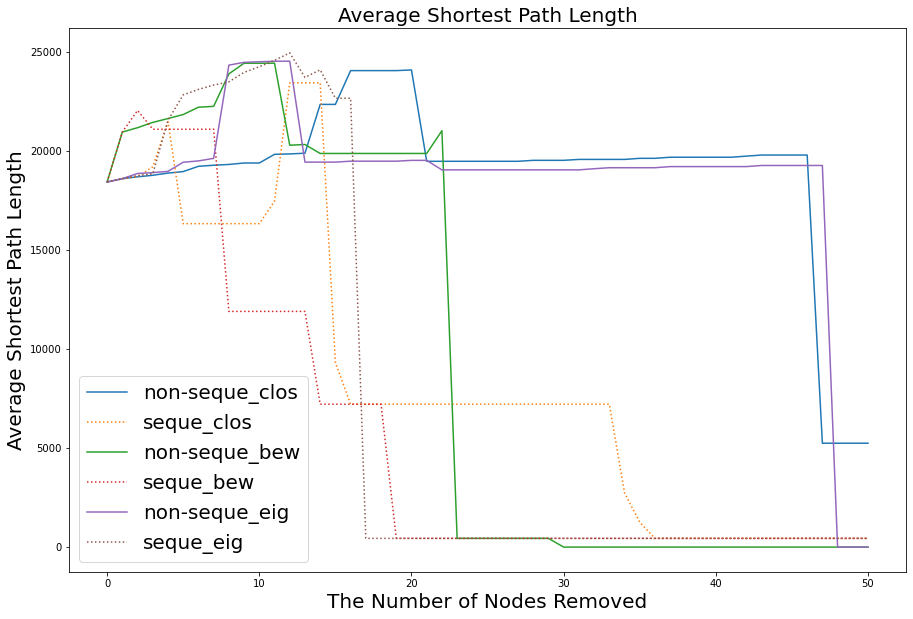

In [246]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# advisee度的折线图分布
plt.plot(Result_final[Result_final['strategy']=='unseque_clos'].step_k, Result_final[Result_final['strategy']=='unseque_clos'].avg_path_dis,label="non-seque_clos", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_clos'].step_k, Result_final[Result_final['strategy']=='seque_clos'].avg_path_dis, label="seque_clos", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_bew'].step_k, Result_final[Result_final['strategy']=='unseque_bew'].avg_path_dis,label="non-seque_bew", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_bew'].step_k, Result_final[Result_final['strategy']=='seque_bew'].avg_path_dis, label="seque_bew", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_eig'].step_k, Result_final[Result_final['strategy']=='unseque_eig'].avg_path_dis,label="non-seque_eig", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_eig'].step_k, Result_final[Result_final['strategy']=='seque_eig'].avg_path_dis, label="seque_eig", linestyle=":")
   
   # advisor度的折线图分布
    #plt.plot(adsX, adsY, label="advisor度的分布", linestyle="-.")
plt.legend(fontsize=20)
plt.title("Average Shortest Path Length",fontsize=20)
plt.xlabel("The Number of Nodes Removed",fontsize=20)
plt.ylabel("Average Shortest Path Length",fontsize=20)
plt.savefig('Average Shortest Path Length.png', dpi=300, transparent=True)
plt.show()


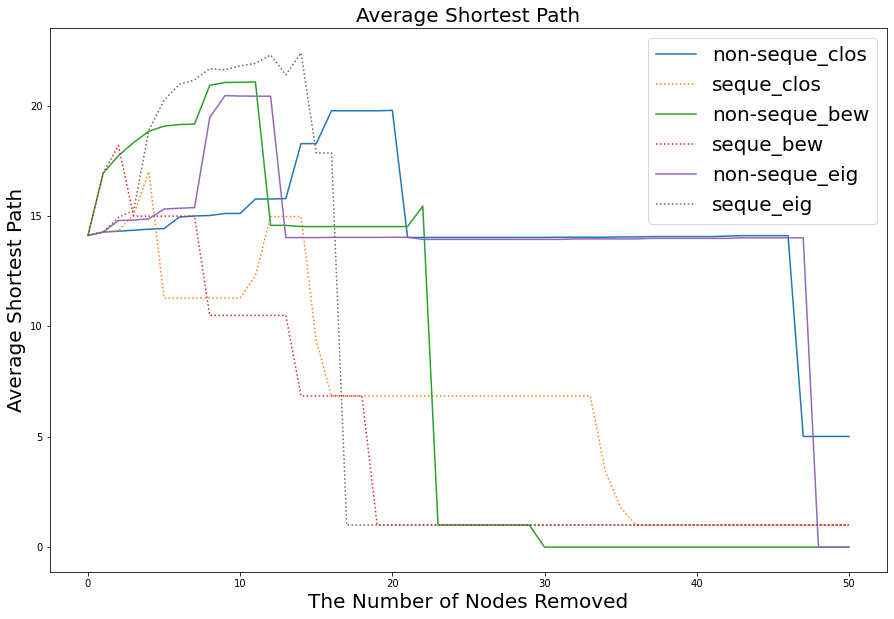

In [245]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# advisee度的折线图分布
plt.plot(Result_final[Result_final['strategy']=='unseque_clos'].step_k, Result_final[Result_final['strategy']=='unseque_clos'].avg_path_n,label="non-seque_clos", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_clos'].step_k, Result_final[Result_final['strategy']=='seque_clos'].avg_path_n, label="seque_clos", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_bew'].step_k, Result_final[Result_final['strategy']=='unseque_bew'].avg_path_n,label="non-seque_bew", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_bew'].step_k, Result_final[Result_final['strategy']=='seque_bew'].avg_path_n, label="seque_bew", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_eig'].step_k, Result_final[Result_final['strategy']=='unseque_eig'].avg_path_n,label="non-seque_eig", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_eig'].step_k, Result_final[Result_final['strategy']=='seque_eig'].avg_path_n, label="seque_eig", linestyle=":")

#plt.plot(Result_final[Result_final['strategy']=='seque_eig'].step_k, Result_final[Result_final['strategy']=='seque_eig'].components, label="components", linestyle=":")
   
   # advisor度的折线图分布
    #plt.plot(adsX, adsY, label="advisor度的分布", linestyle="-.")
plt.legend(fontsize=20)
plt.title("Average Shortest Path",fontsize=20)
plt.xlabel("The Number of Nodes Removed",fontsize=20)
plt.ylabel("Average Shortest Path",fontsize=20)
plt.savefig('Average Shortest Path.png', dpi=300, transparent=True)
plt.show()


In [209]:
#plt.savefig('Global Clustering Coeffcients(flow).png', dpi=300, transparent=True)

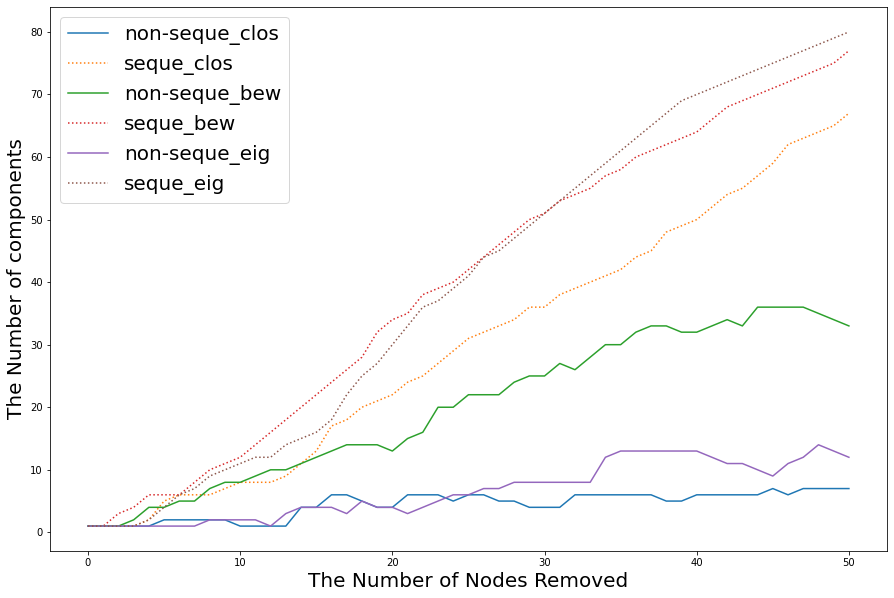

In [242]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# advisee度的折线图分布
plt.plot(Result_final[Result_final['strategy']=='unseque_clos'].step_k, Result_final[Result_final['strategy']=='unseque_clos'].components,label="non-seque_clos", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_clos'].step_k, Result_final[Result_final['strategy']=='seque_clos'].components, label="seque_clos", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_bew'].step_k, Result_final[Result_final['strategy']=='unseque_bew'].components,label="non-seque_bew", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_bew'].step_k, Result_final[Result_final['strategy']=='seque_bew'].components, label="seque_bew", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_eig'].step_k, Result_final[Result_final['strategy']=='unseque_eig'].components,label="non-seque_eig", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_eig'].step_k, Result_final[Result_final['strategy']=='seque_eig'].components, label="seque_eig", linestyle=":")

#plt.plot(Result_final[Result_final['strategy']=='seque_eig'].step_k, Result_final[Result_final['strategy']=='seque_eig'].components, label="components", linestyle=":")
   
   # advisor度的折线图分布
    #plt.plot(adsX, adsY, label="advisor度的分布", linestyle="-.")
plt.legend(fontsize=20)
#plt.title("Components Change",fontsize=20)
plt.xlabel("The Number of Nodes Removed",fontsize=20)
plt.ylabel("The Number of components",fontsize=20)
plt.savefig('components change.png', dpi=300, transparent=True)
plt.show()


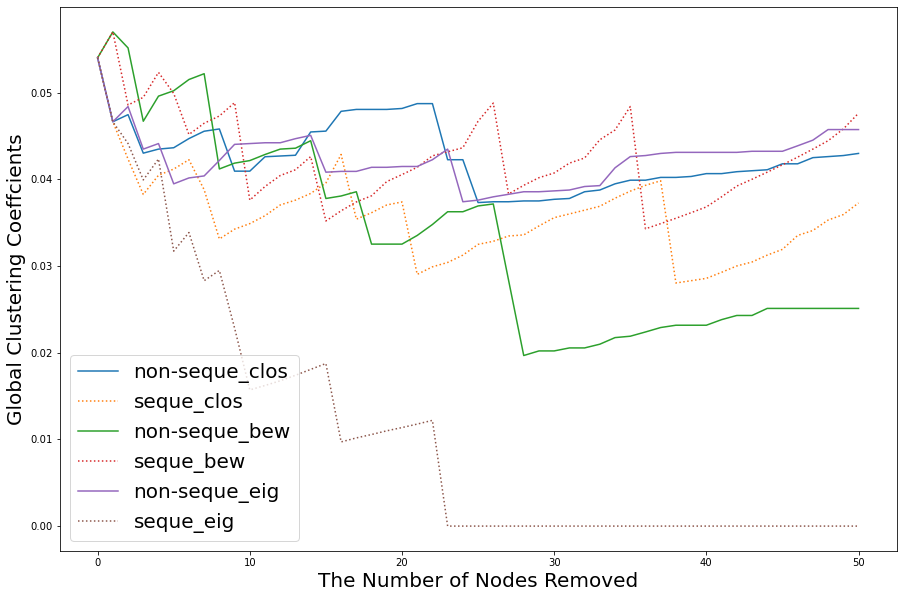

In [268]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# advisee度的折线图分布
plt.plot(Result_final[Result_final['strategy']=='unseque_clos'].step_k, Result_final[Result_final['strategy']=='unseque_clos'].c_global,label="non-seque_clos", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_clos'].step_k, Result_final[Result_final['strategy']=='seque_clos'].c_global, label="seque_clos", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_bew'].step_k, Result_final[Result_final['strategy']=='unseque_bew'].c_global,label="non-seque_bew", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_bew'].step_k, Result_final[Result_final['strategy']=='seque_bew'].c_global, label="seque_bew", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_eig'].step_k, Result_final[Result_final['strategy']=='unseque_eig'].c_global,label="non-seque_eig", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_eig'].step_k, Result_final[Result_final['strategy']=='seque_eig'].c_global, label="seque_eig", linestyle=":")
   
   # advisor度的折线图分布
    #plt.plot(adsX, adsY, label="advisor度的分布", linestyle="-.")
plt.legend(fontsize=20)
#plt.title("Global Clustering Coeffcients",fontsize=20)
plt.xlabel("The Number of Nodes Removed",fontsize=20)
plt.ylabel("Global Clustering Coeffcients",fontsize=20)
plt.savefig('Global Clustering Coeffcients.png', dpi=300, transparent=True)
plt.show()


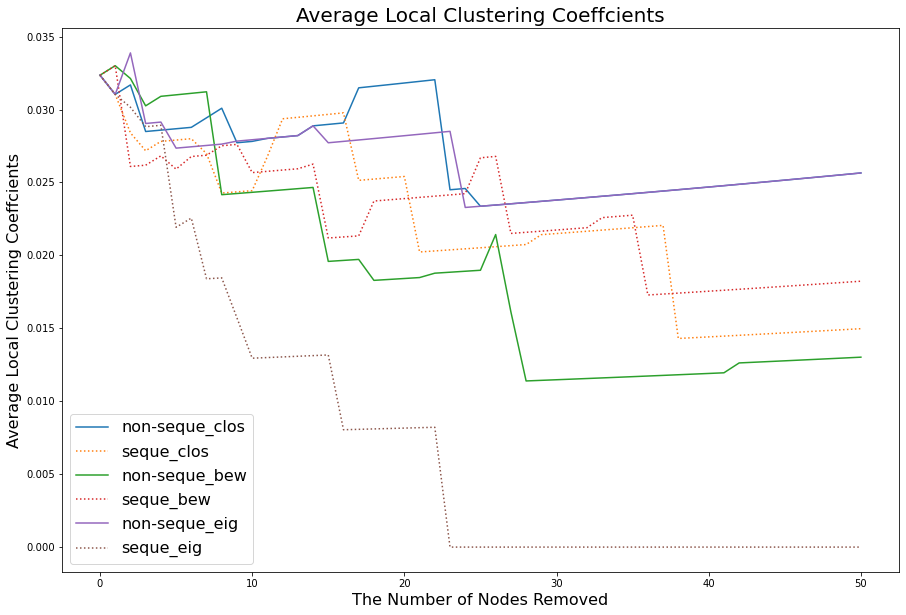

In [212]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# advisee度的折线图分布
plt.plot(Result_final[Result_final['strategy']=='unseque_clos'].step_k, Result_final[Result_final['strategy']=='unseque_clos'].c_local,label="non-seque_clos", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_clos'].step_k, Result_final[Result_final['strategy']=='seque_clos'].c_local, label="seque_clos", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_bew'].step_k, Result_final[Result_final['strategy']=='unseque_bew'].c_local,label="non-seque_bew", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_bew'].step_k, Result_final[Result_final['strategy']=='seque_bew'].c_local, label="seque_bew", linestyle=":")
   
plt.plot(Result_final[Result_final['strategy']=='unseque_eig'].step_k, Result_final[Result_final['strategy']=='unseque_eig'].c_local,label="non-seque_eig", linestyle="-")
plt.plot(Result_final[Result_final['strategy']=='seque_eig'].step_k, Result_final[Result_final['strategy']=='seque_eig'].c_local, label="seque_eig", linestyle=":")
   
   # advisor度的折线图分布
    #plt.plot(adsX, adsY, label="advisor度的分布", linestyle="-.")
plt.legend(fontsize=16)
plt.title("Average Local Clustering Coeffcients",fontsize=20)
plt.xlabel("The Number of Nodes Removed",fontsize=16)
plt.ylabel("Average Local Clustering Coeffcients",fontsize=16)
plt.savefig('Average Local Clustering Coeffcients.png', dpi=300, transparent=True)
plt.show()


## Commuters flows in the tube network

We are going to create the flows of commuters travelling between any pair of tube stations

In [6]:
import pandas as pd
import os
#First, we read the csv file with commuting flows starting and ending between stations, called Origin-Destination:
#Check you are in the correct directory to read the csv 
os.chdir('/home/jovyan/work/simulation/week10/TubeCommuters_Practical')

In [7]:
# Read Origin-Destination table from the csv
orig_dest = pd.read_csv('ODtube2017.csv')
orig_dest.head()

,From,station_name,To,station_name.1,total_wtrips
0,500,Acton Town,505,Alperton,143
1,500,Acton Town,506,Amersham,22
2,500,Acton Town,507,Angel,15
3,500,Acton Town,508,Archway,9
4,500,Acton Town,510,Arsenal,9


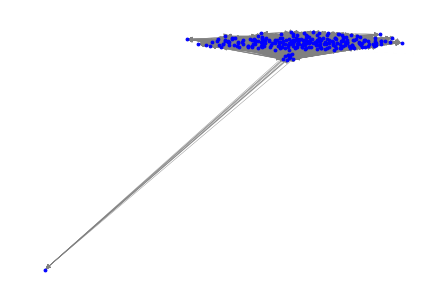

In [36]:
#This can be seen as a network by itself:
g_OD = nx.from_pandas_edgelist(orig_dest, 'station_name', 'station_name.1',['total_wtrips'],create_using=nx.MultiDiGraph)

# Plot graph
nx.draw(g_OD,
        node_color='b',
        node_size=8,
        edge_color='gray',
        width=0.4)

In [37]:
#Directed weighted network, weights are the total number of commuters from one station to another
list(g_OD.edges(data=True))[0:10]

[('Acton Town', 'Alperton', {'total_wtrips': 143}),
 ('Acton Town', 'Amersham', {'total_wtrips': 22}),
 ('Acton Town', 'Angel', {'total_wtrips': 15}),
 ('Acton Town', 'Archway', {'total_wtrips': 9}),
 ('Acton Town', 'Arsenal', {'total_wtrips': 9}),
 ('Acton Town', 'Baker Street', {'total_wtrips': 19}),
 ('Acton Town', 'Bank', {'total_wtrips': 226}),
 ('Acton Town', 'Barbican', {'total_wtrips': 7}),
 ('Acton Town', 'Barons Court', {'total_wtrips': 36}),
 ('Acton Town', 'Bayswater', {'total_wtrips': 2})]

In [38]:
#Change the names of nodes by the id in g_shp_un (tube network):

#1.Copy name as an attribute:
nod_names={(e1):e1 for e1 in g_OD.nodes()}
nx.set_node_attributes(g_OD,nod_names,'station') #with nod_id1 or nod_id2 is enought
print(list(g_OD.nodes(data=True))[:10])

[('Acton Town', {'station': 'Acton Town'}), ('Alperton', {'station': 'Alperton'}), ('Amersham', {'station': 'Amersham'}), ('Angel', {'station': 'Angel'}), ('Archway', {'station': 'Archway'}), ('Arsenal', {'station': 'Arsenal'}), ('Baker Street', {'station': 'Baker Street'}), ('Bank', {'station': 'Bank'}), ('Barbican', {'station': 'Barbican'}), ('Barons Court', {'station': 'Barons Court'})]


In [39]:
#2.Do the mapping with id in g_shp_un
mapping = {g_shp_un.nodes[i]['station']:i for i in g_shp_un.nodes()}   #ID是shp中的
g_OD = nx.relabel_nodes(g_OD, mapping)
print(list(g_OD.nodes(data=True))[:10])

[(111, {'station': 'Acton Town'}), (238, {'station': 'Alperton'}), (172, {'station': 'Amersham'}), (196, {'station': 'Angel'}), (198, {'station': 'Archway'}), (244, {'station': 'Arsenal'}), (0, {'station': 'Baker Street'}), (25, {'station': 'Bank'}), (77, {'station': 'Barbican'}), (100, {'station': 'Barons Court'})]


In [40]:
#and we can add coodenates to the nodes, from the shapefile of the tube network:
nod_coords={(e1):coord for e1, coord in g_shp_un.nodes(data='station_coord')}

nx.set_node_attributes(g_OD,nod_coords,'station_coord') #with nod_id1 or nod_id2 is enought

pos = {e1: xy for e1,xy in g_OD.nodes(data='station_coord')}


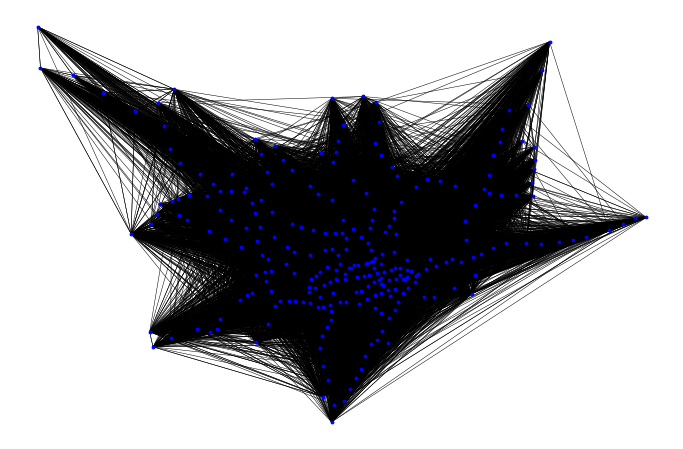

In [41]:
#To finaly plot the OD matrix as a network:
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_OD,g_OD.nodes(data='station_coord'),node_size=8,node_color='b')
nx.draw_networkx_edges(g_OD,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()



In [42]:
#Even if we have not considered the weights (we will later on), 
#this network does not represent the commuting flows, what is happening?

#From the Origin Destination network, we need to compute the number of commuters for each pair of stations:
#How will we know the path of commuters from their origin to their destinations? 
#Given that the tube network is undirected and that we do not have information on the different tube lines, 
#we will assume that commuters use the shortest path between Origin and Destination
# 即使我们没有考虑权重（我们将在后面介绍），＃this网络也不代表通勤流量，这是怎么回事？
#从始发地目的地网络，我们需要计算每对车站的通勤人数：＃我们如何知道通勤者从其出发地到目的地的路径？
#鉴于管网是无方向的，并且我们在不同的管线上没有信息，＃我们将假定通勤者使用始发站和目的地之间的最短路径

In [15]:
# tube network is undirected,从始发地目的地网络，我们需要计算每对车站的通勤人数：

In [16]:
print(list(g_OD.edges(data='total_wtrips'))[:5])

NameError: name 'g_OD' is not defined

In [17]:
print(list(g_OD.edges(data=True))[:5])

NameError: name 'g_OD' is not defined

In [18]:
N=len(g_shp_un.nodes()) #As we are going to use shortest path in the tube network, N is from g_shp_un
adj_c=np.zeros((N, N))
for e1,e2,C in list(g_OD.edges(data='total_wtrips'))[:2]:
    print(f'e1,e2,C ：{e1} {e2} {C}')
    path = nx.dijkstra_path(g_shp_un,e1,e2,'distance')  #shortest path e1,e2 taking into account distance weights in g_shp_un
    path_edges = list(zip(path,path[1:]))
    print(f'path ：{path}')
    print(f'path edge ：{path_edges}')#list of tuples with shortest path edges [(e1,s2),(s3,s4),...,(s(n-1),e2)]
    for (s1,s2) in path_edges:
            adj_c[s1,s2]=adj_c[s1,s2]+C
            print(f'adj_c[{s1} {s2}] ：{adj_c[s1,s2]}')  

#当下一个循环中遇到path中包含这个pair，则flow值会叠加
#例如，第二个循环adj_c[111 115]=192+22=214
            

NameError: name 'g_shp_un' is not defined

In [19]:
adj_c[111,115]   #？？？？？

NameError: name 'adj_c' is not defined

In [20]:
adj_c[111,238]    #拆分了，111和238没有直接相连,所有没有flow值!!!!

NameError: name 'adj_c' is not defined

In [21]:
#Now, let's create the network with the actual flow of commuters travelling between each pair of stations,
#regardless which was their origin and destination:

#We will create that graph using the adjacency matrix method that was presented in previous practicals:
#First we create an empty adjacency matrix:
#＃现在，让我们使用每对站点之间的通勤者的实际流量来创建网络，
#无论它们的始发地和目的地是什么：
#我们将使用先前实践中介绍的邻接矩阵方法来创建该图： 创建一个空的邻接矩阵：
N=len(g_shp_un.nodes()) #As we are going to use shortest path in the tube network, N is from g_shp_un
adj_c=np.zeros((N, N))

#Fill the adjacency matrix with Origin-Destination flows:
#From origin to destination with x commuters, we will compute the shortest path and fill the number of commuters
#for each pair of stations they go through:

for e1,e2,C in g_OD.edges(data='total_wtrips'):
    path = nx.dijkstra_path(g_shp_un,e1,e2,'distance')  #shortest path e1,e2 taking into account distance weights in g_shp_un
    path_edges = list(zip(path,path[1:])) #list of tuples with shortest path edges [(e1,s2),(s3,s4),...,(s(n-1),e2)]
    for (s1,s2) in path_edges:
            adj_c[s1,s2]=adj_c[s1,s2]+C
            #!!!sum the contribution of the OD flow to all edges in the shortest path
adj_c

NameError: name 'g_shp_un' is not defined

In [ ]:
#Create the new graph from the adjancency matrix:
g_flows=nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)


In [75]:
#we need to give coordinates to these nodes too:
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226)}),
 (1, {'station_coord': (-0.1631, 51.5225)}),
 (2, {'station_coord': (-0.1466, 51.5234)}),
 (3, {'station_coord': (-0.1247, 51.508)}),
 (4, {'station_coord': (-0.1223, 51.5074)}),
 (5, {'station_coord': (-0.1342, 51.5098)}),
 (6, {'station_coord': (-0.1679, 51.5199)}),
 (7, {'station_coord': (-0.1755, 51.5154)}),
 (8, {'station_coord': (-0.1001, 51.4943)}),
 (9, {'station_coord': (-0.1115, 51.4991)})]

In [76]:
#also the station names:
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
nx.set_node_attributes(g_flows,nod_names,'station')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226), 'station': 'Baker Street'}),
 (1, {'station_coord': (-0.1631, 51.5225), 'station': 'Marylebone'}),
 (2, {'station_coord': (-0.1466, 51.5234), 'station': "Regent's Park"}),
 (3, {'station_coord': (-0.1247, 51.508), 'station': 'Charing Cross'}),
 (4, {'station_coord': (-0.1223, 51.5074), 'station': 'Embankment'}),
 (5, {'station_coord': (-0.1342, 51.5098), 'station': 'Picadilly Circus'}),
 (6, {'station_coord': (-0.1679, 51.5199), 'station': 'Edgware Road (B)'}),
 (7, {'station_coord': (-0.1755, 51.5154), 'station': 'Paddington'}),
 (8, {'station_coord': (-0.1001, 51.4943), 'station': 'Elephant & Castle'}),
 (9, {'station_coord': (-0.1115, 51.4991), 'station': 'Lambeth North'})]

In [77]:
print(list(g_flows.edges(data=True))[:5])

[(0, 1, {'weight': 96682.0}), (0, 2, {'weight': 1560.0}), (0, 33, {'weight': 126001.0}), (0, 75, {'weight': 4235.0}), (0, 76, {'weight': 92796.0})]


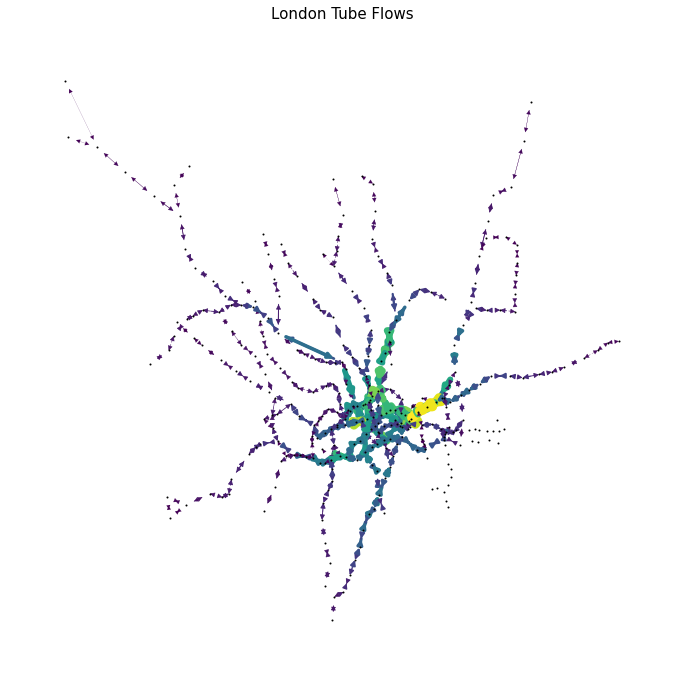

In [78]:
# Lets set colour and size of nodes according to the flows_
weights = [w for e1,e2,w in g_flows.edges(data='weight')]

weights_color=[(w/max(weights)) for e1,e2,w in g_flows.edges(data='weight')]
weights_size=[(w/max(weights)*10) for e1,e2,w in g_flows.edges(data='weight')]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = {e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows, pos,edge_color=weights_color, width=weights_size)

nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("London Tube Flows",fontsize=15)
plt.show()

#this are the directed flows in the tube network!

In [79]:
#We can search for nodes in the flow network
#node
node = [(x,y) for x,y in g_flows.nodes(data='station') if y=='Kilburn']
node

[(168, 'Kilburn')]

In [80]:
#or if you do not know how exacly it is written:
node2 = [(x,y) for x,y in g_flows.nodes(data='station') if 'Kil' in str(y)]
print(node2)
g_flows.nodes[19],g_flows.nodes[168] #the IDs may change for Python3/Python2 depending on the order of appearance

[(19, 'Kilburn Park'), (168, 'Kilburn')]


({'station_coord': (-0.1939, 51.5351), 'station': 'Kilburn Park'},
 {'station_coord': (-0.2047, 51.5471), 'station': 'Kilburn'})

In [81]:
#We can also search edges, however, edges are called by the IDs, no by the names:
print(list(g_flows.edges(data=True))[0:10])

[(0, 1, {'weight': 96682.0}), (0, 2, {'weight': 1560.0}), (0, 33, {'weight': 126001.0}), (0, 75, {'weight': 4235.0}), (0, 76, {'weight': 92796.0}), (0, 152, {'weight': 10344.0}), (0, 165, {'weight': 73307.0}), (1, 0, {'weight': 102485.0}), (1, 6, {'weight': 86519.0}), (2, 0, {'weight': 1167.0})]


In [82]:
#as edges are saved using the IDs, let us create an edges attribute with the station names:
edges_names={(e1,e2):(g_flows.nodes[e1]['station'],g_flows.nodes[e2]['station']) for e1,e2 in g_flows.edges()}

nx.set_edge_attributes(g_flows,edges_names,'station_names') 
print(list(g_flows.edges(data=True))[0:10])

[(0, 1, {'weight': 96682.0, 'station_names': ('Baker Street', 'Marylebone')}), (0, 2, {'weight': 1560.0, 'station_names': ('Baker Street', "Regent's Park")}), (0, 33, {'weight': 126001.0, 'station_names': ('Baker Street', 'Bond Street')}), (0, 75, {'weight': 4235.0, 'station_names': ('Baker Street', 'Edgware Road (C)')}), (0, 76, {'weight': 92796.0, 'station_names': ('Baker Street', 'Great Portland Street')}), (0, 152, {'weight': 10344.0, 'station_names': ('Baker Street', "St. John's Wood")}), (0, 165, {'weight': 73307.0, 'station_names': ('Baker Street', 'Finchley Road')}), (1, 0, {'weight': 102485.0, 'station_names': ('Marylebone', 'Baker Street')}), (1, 6, {'weight': 86519.0, 'station_names': ('Marylebone', 'Edgware Road (B)')}), (2, 0, {'weight': 1167.0, 'station_names': ("Regent's Park", 'Baker Street')})]


In [83]:
#now, we can search edges by names, as for example all edges comming to and leaving from Kilburn Park:
edge = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Kilburn Park' in str(y)]
print(edge)

[(17, 19), (19, 17), (19, 20), (20, 19)]


In [84]:
g_flows.edges[(17, 19)] #Again, the IDs may change for Python3/Python2 depending on the order of appearance

{'weight': 22009.0, 'station_names': ("Queen's Park", 'Kilburn Park')}

## FLOW Centrality measures

Let's explore the commuting flows network with some exercises on different type of centrality measures and disruptions on the network. Keep in mind that this network is a directed network and nodes and edges centrality depends on the direction of the flows.

In [100]:
flow_weights_w={(e1, e2):round(1./weight,7) for e1, e2, weight in g_flows.edges(data='weight')}
nx.set_edge_attributes(g_flows,flow_weights_w,'inverse flow')


In [102]:
#distance={(e1, e2):nx.dijkstra_path_length(g_flows,e1, e2) for e1, e2 in g_flows.edges(data=True)}

#nx.set_edge_attributes(g_flows,distance,'distance')

ValueError: too many values to unpack (expected 2)

In [94]:
list(g_flows.edges(data=True))[:5]

[(0,
  1,
  {'weight': 96682.0,
   'station_names': ('Baker Street', 'Marylebone'),
   'inverse flow': 1.03e-05}),
 (0,
  2,
  {'weight': 1560.0,
   'station_names': ('Baker Street', "Regent's Park"),
   'inverse flow': 0.000641}),
 (0,
  33,
  {'weight': 126001.0,
   'station_names': ('Baker Street', 'Bond Street'),
   'inverse flow': 7.9e-06}),
 (0,
  75,
  {'weight': 4235.0,
   'station_names': ('Baker Street', 'Edgware Road (C)'),
   'inverse flow': 0.0002361}),
 (0,
  76,
  {'weight': 92796.0,
   'station_names': ('Baker Street', 'Great Portland Street'),
   'inverse flow': 1.08e-05})]

### Result2`

NameError: name 'nod' is not defined

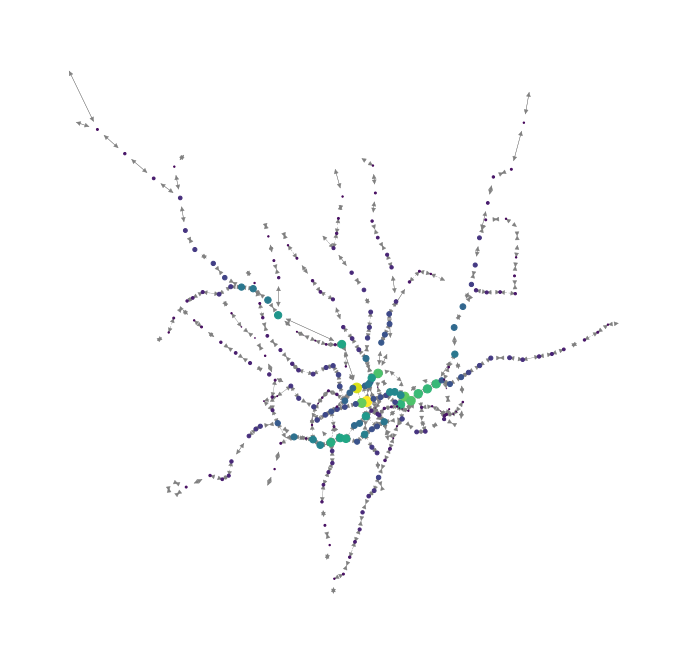

In [110]:

bet_london_w=nx.betweenness_centrality(g_flows, weight='inverse flow', normalized=True)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_flows,bet_london_w,'betweenness_flows')

betweenness_w_values=[(i[1]['betweenness_flows']) for i in g_flows.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_flows']/max(betweenness_w_values)) for i in g_flows.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_flows']/max(betweenness_w_values)*100) for i in g_flows.nodes(data=True)]

# Plot graph
pos={e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))

pos = {e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows, pos,edge_color='gray', width=0.4)

nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.axis("off")
plt.colorbar(nod,label="Betweenness Centrality Commuting Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality of Commuting Flows",fontsize=15)
plt.show()

In [112]:
list(g_flows.nodes(data=True))[:5]

[(0,
  {'station_coord': (-0.1571, 51.5226),
   'station': 'Baker Street',
   'betweenness_flows': 0.2942622950819672}),
 (1,
  {'station_coord': (-0.1631, 51.5225),
   'station': 'Marylebone',
   'betweenness_flows': 0.10358067299396032}),
 (2,
  {'station_coord': (-0.1466, 51.5234),
   'station': "Regent's Park",
   'betweenness_flows': 0.0}),
 (3,
  {'station_coord': (-0.1247, 51.508),
   'station': 'Charing Cross',
   'betweenness_flows': 0.03250647109577222}),
 (4,
  {'station_coord': (-0.1223, 51.5074),
   'station': 'Embankment',
   'betweenness_flows': 0.03854616048317515})]

In [115]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_flow=dict(g_flows.nodes(data=True))

#Python2:
#import operator
#listbet_un=sorted(dict_bet_un.items(), key=operator.itemgetter(1),reverse=True)
#listbet_un[:10]

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_bet_flow.items(), key=lambda x: x[1]['betweenness_flows'],reverse=True))
list(listbet_un.items())[:5]

[(24,
  {'station_coord': (-0.1415, 51.515),
   'station': 'Oxford Circus',
   'betweenness_flows': 0.3127642364106989}),
 (0,
  {'station_coord': (-0.1571, 51.5226),
   'station': 'Baker Street',
   'betweenness_flows': 0.2942622950819672}),
 (33,
  {'station_coord': (-0.1494, 51.5142),
   'station': 'Bond Street',
   'betweenness_flows': 0.24023943054357205}),
 (26,
  {'station_coord': (-0.0823, 51.5178),
   'station': 'Liverpool Street',
   'betweenness_flows': 0.2368960310612597}),
 (95,
  {'station_coord': (-0.0726, 51.5154),
   'station': 'Aldgate East',
   'betweenness_flows': 0.22537748058671267})]

In [120]:
#?nx.average_shortest_path_length
gflow_unseque_bew=g_flows.copy(as_view=False)

In [121]:
#averagedegree(g_unseque_bew)

In [122]:
import pandas as pd
Result2=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result2.loc[0]=['original state',0,'unseque_bew',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result2

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
0,original state,0,unseque_bew,1,2.3072,14.126647,18447.986496,0.032353,0.05401


In [123]:
#To remove nodes: 

#If we want to remove the node with the max value of betweenness centrality:
for k in range(1,51):
    betweenness_w_values=[(i[1]['betweenness_flows']) for i in gflow_unseque_bew.nodes(data=True)]
    maxbet=[n for n in gflow_unseque_bew.nodes() if gflow_unseque_bew.nodes[n]['betweenness_flows'] == max(betweenness_w_values)]
    if len(maxbet) != 1:
        for i in maxbet: 
            maxbet=[i]
    #######remove#################
    l1=list(gflow_unseque_bew.nodes)
    gflow_unseque_bew.remove_nodes_from(maxbet)
    l2=list(gflow_unseque_bew.nodes)
    c = nx.clustering(gflow_unseque_bew)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result2.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result2.loc[k,'c_global']=nx.transitivity(gflow_unseque_bew)
    Result2.loc[k,'stationremoved']= set(l1) - set(l2)
    Result2.loc[k,'step_k']= k
    Result2.loc[k,'strategy']= 'unseque_bew'
   # Result2.loc[k,'components']= nx.number_connected_components(gflow_unseque_bew)
    #Result2.loc[k,'avg_path_n']=averageshortestpathlength(gflow_unseque_bew)
    #Result2.loc[k,'avg_path_dis']=averageshortestpathlength_dis(gflow_unseque_bew)
    #Result.loc[k,'degree']= nx.degree(gflow_unseque_bew)
    k=k+1

In [124]:
Result2

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
0,original state,0,unseque_bew,1,2.3072,14.126647,18447.986496,0.032353,0.054010
1,24,1,unseque_bew,NaN,NaN,NaN,NaN,0.031126,0.050279
2,0,2,unseque_bew,NaN,NaN,NaN,NaN,0.031228,0.053254
3,33,3,unseque_bew,NaN,NaN,NaN,NaN,0.031331,0.053892
4,26,4,unseque_bew,NaN,NaN,NaN,NaN,0.030331,0.050104
5,95,5,unseque_bew,NaN,NaN,NaN,NaN,0.030432,0.050633
6,88,6,unseque_bew,NaN,NaN,NaN,NaN,0.031089,0.054054
7,96,7,unseque_bew,NaN,NaN,NaN,NaN,0.031193,0.054670
8,32,8,unseque_bew,NaN,NaN,NaN,NaN,0.031298,0.055944
9,131,9,unseque_bew,NaN,NaN,NaN,NaN,0.031403,0.055944


### seque_clos

In [149]:
gflow_seque_clos=g_shp_un.copy(as_view=False)
#average_path=averageshortestpathlength(g_seque_clos)
#print(average_path)

In [150]:
a = nx.transitivity(gflow_seque_clos)
c = nx.clustering(gflow_seque_clos)
    # we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
t = sum([i[1] for i in c]) / len(c)
print(f'{a}/////{t}')

0.054009819967266774/////0.032352941176470564


In [151]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result2.loc[153]=['original state',0,'seque_clos',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result2[150:160]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
151,231,49,unseque_clos,NaN,NaN,NaN,NaN,0.028145,0.045045
152,83,50,unseque_clos,NaN,NaN,NaN,NaN,0.028255,0.045181
153,original state,0,seque_clos,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [155]:
#To remove nodes: 

#If we want to remove the node with the max value of betweenness centrality:
for k in range(154,204):
    
    #Weighted closeness centrality: 
    clos_w=nx.closeness_centrality(gflow_seque_clos, distance='inverse flow')
    # We can add these values to the nodes attributes:
    nx.set_node_attributes(gflow_seque_clos,clos_w,'closeness_flow')

    clos_w_values=[(i[1]['closeness_flow']) for i in gflow_seque_clos.nodes(data=True)]
    maxclos=[n for n in gflow_seque_clos.nodes() if gflow_seque_clos.nodes[n]['closeness_flow'] == max(clos_w_values)]
    if len(maxclos) != 1:
        for i in maxclos: 
            maxclos=[i]
            
    #######remove#################
    l1=list(gflow_seque_clos.nodes)
    gflow_seque_clos.remove_nodes_from(maxclos)
    l2=list(gflow_seque_clos.nodes)
    c = nx.clustering(gflow_seque_clos)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result2.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result2.loc[k,'c_global']=nx.transitivity(gflow_seque_clos)
    #print(f'set:{set(l1) - set(l2)}')
    Result2.loc[k,'stationremoved']= set(l1) - set(l2)
    Result2.loc[k,'step_k']= k-153
    Result2.loc[k,'strategy']= 'seque_clos'
    #Result1.loc[k,'components']= nx.number_connected_components(g_seque_clos)
    #Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_seque_clos)
    #Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_seque_clos)
    #Result.loc[k,'degree']= averagedegree(g_seque_clos)
    k=k+1

In [157]:
Result2[150:170]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
151,231,49,unseque_clos,NaN,NaN,NaN,NaN,0.028145,0.045045
152,83,50,unseque_clos,NaN,NaN,NaN,NaN,0.028255,0.045181
153,original state,0,seque_clos,1,2.3072,14.126647,18447.986496,0.032353,0.054010
154,155,1,seque_clos,NaN,NaN,NaN,NaN,0.031585,0.046713
155,10,2,seque_clos,NaN,NaN,NaN,NaN,0.029934,0.043716
156,88,3,seque_clos,NaN,NaN,NaN,NaN,0.030583,0.046243
157,24,4,seque_clos,NaN,NaN,NaN,NaN,0.032892,0.048096
158,93,5,seque_clos,NaN,NaN,NaN,NaN,0.033001,0.048682
159,25,6,seque_clos,NaN,NaN,NaN,NaN,0.031889,0.044872
160,7,7,seque_clos,NaN,NaN,NaN,NaN,0.031996,0.046358


In [ ]:
?nx.clustering

#### eig

In [105]:
### UNSEQUE

In [163]:
gflow_unseque_eig=g_shp_un.copy(as_view=False)
#average_path=averageshortestpathlength(g_unseque_eig)
#print(average_path)

In [159]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result2.loc[204]=['original state',0,'unseque_eig',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result2[200:210]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
201,299,48,seque_clos,NaN,NaN,NaN,NaN,0.009044,0.022388
202,208,49,seque_clos,NaN,NaN,NaN,NaN,0.009079,0.022901
203,173,50,seque_clos,NaN,NaN,NaN,NaN,0.009115,0.023622
204,original state,0,unseque_eig,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [82]:
#list(g_unseque_deg.nodes(data=True))[:5]

In [164]:
#Weighted closeness centrality: 
eig_w=nx.eigenvector_centrality(gflow_unseque_eig,max_iter=20000)
# We can add these values to the nodes attributes:
nx.set_node_attributes(gflow_unseque_eig,eig_w,'eigenvector')

#get a list of nodes with higeher betweeness centrality:
dict_eig_un=dict(gflow_unseque_eig.nodes(data=True))

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_eig_un.items(), key=lambda x: x[1]['eigenvector'],reverse=True))
list(listbet_un.items())[:5]

[(24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'degree': 6,
   'degree_v': 5100.083793721,
   'eigenvector': 0.3980441165354966}),
 (155,
  {'station': 'Green Park',
   'station_coord': (-0.1428, 51.5067),
   'degree': 6,
   'degree_v': 5895.1794532,
   'eigenvector': 0.3931241535183219}),
 (5,
  {'station': 'Picadilly Circus',
   'station_coord': (-0.1342, 51.5098),
   'degree': 4,
   'degree_v': 2603.126059659,
   'eigenvector': 0.31213571308661736}),
 (33,
  {'station': 'Bond Street',
   'station_coord': (-0.1494, 51.5142),
   'degree': 4,
   'degree_v': 3226.288114466,
   'eigenvector': 0.2836211053955423}),
 (86,
  {'station': 'Westminster',
   'station_coord': (-0.1254, 51.501),
   'degree': 4,
   'degree_v': 3521.570898102,
   'eigenvector': 0.2259094069367602})]

In [165]:
#To remove nodes: 

#If we want to remove the node with the max value of eig centrality:
for k in range(205,255):
    
   
    eig_values=[(i[1]['eigenvector']) for i in gflow_unseque_eig.nodes(data=True)]
    maxeig=[n for n in gflow_unseque_eig.nodes() if gflow_unseque_eig.nodes[n]['eigenvector'] == max(eig_values)]
    if len(maxeig) != 1:
        for i in maxeig: 
            maxeig=[i]
            
    #######remove#################
    l1=list(gflow_unseque_eig.nodes)
    gflow_unseque_eig.remove_nodes_from(maxeig)
    l2=list(gflow_unseque_eig.nodes)
    c = nx.clustering(gflow_unseque_eig)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result2.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result2.loc[k,'c_global']=nx.transitivity(gflow_unseque_eig)
    #print(f'set:{set(l1) - set(l2)}')
    Result2.loc[k,'stationremoved']= set(l1) - set(l2)
    Result2.loc[k,'step_k']= k-204
    Result2.loc[k,'strategy']= 'unseque_eig'
   # Result1.loc[k,'components']= nx.number_connected_components(g_unseque_eig)
    #Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_unseque_eig)
    #Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_unseque_eig)
   
    
    #Result.loc[k,'degree']= nx.degree(g_unseque_eig)
    k=k+1

In [117]:
#?nx.eigenvector_centrality

In [167]:
Result2[200:251]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
201,299,48,seque_clos,NaN,NaN,NaN,NaN,0.009044,0.022388
202,208,49,seque_clos,NaN,NaN,NaN,NaN,0.009079,0.022901
203,173,50,seque_clos,NaN,NaN,NaN,NaN,0.009115,0.023622
204,original state,0,unseque_eig,1,2.3072,14.126647,18447.986496,0.032353,0.054010
205,24,1,unseque_eig,NaN,NaN,NaN,NaN,0.031038,0.046632
206,155,2,unseque_eig,NaN,NaN,NaN,NaN,0.033882,0.048387
207,5,3,unseque_eig,NaN,NaN,NaN,NaN,0.029043,0.043478
208,33,4,unseque_eig,NaN,NaN,NaN,NaN,0.029139,0.044118
209,86,5,unseque_eig,NaN,NaN,NaN,NaN,0.027353,0.039474
210,58,6,unseque_eig,NaN,NaN,NaN,NaN,0.027444,0.040153


### seque_eig

In [168]:
gflow_seque_eig=g_shp_un.copy(as_view=False)
#average_path=averageshortestpathlength(g_seque_eig)
#print(average_path)

In [169]:
#import pandas as pd
#Result1=pd.DataFrame(columns=('stationremoved','step_k','strategy','components','degree','avg_path_n','avg_path_dis','c_local','c_global'))
Result2.loc[255]=['original state',0,'seque_eig',1,2.3072,14.12664738026358,18447.986496254973,0.032352941176470564,0.054009819967266774]
Result2[250:260]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
251,95,47,unseque_eig,NaN,NaN,NaN,NaN,0.025354,0.044510
252,7,48,unseque_eig,NaN,NaN,NaN,NaN,0.025452,0.045732
253,207,49,unseque_eig,NaN,NaN,NaN,NaN,0.025551,0.045732
254,217,50,unseque_eig,NaN,NaN,NaN,NaN,0.025651,0.045732
255,original state,0,seque_eig,1,2.3072,14.126647,18447.986496,0.032353,0.054010


In [170]:
#To remove nodes: 

#If we want to remove the node with the max value of betweenness centrality:
for k in range(256,306):
    
    eig_w=nx.eigenvector_centrality(gflow_seque_eig,max_iter=20000)
    nx.set_node_attributes(gflow_seque_eig,eig_w,'eigenvector')


    eig_values=[(i[1]['eigenvector']) for i in gflow_seque_eig.nodes(data=True)]
    maxeig=[n for n in gflow_seque_eig.nodes() if gflow_seque_eig.nodes[n]['eigenvector'] == max(eig_values)]
   # print(f'max:{ len(maxeig) }')
    if len(maxeig) != 1:
        for i in maxeig: 
            maxeig=[i]
            
    #######remove#################
    l1=list(gflow_seque_eig.nodes)
    gflow_seque_eig.remove_nodes_from(maxeig)
    l2=list(gflow_seque_eig.nodes)
    c = nx.clustering(gflow_seque_eig)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    Result2.loc[k,'c_local'] = sum([i[1] for i in c]) / len(c)
    Result2.loc[k,'c_global']=nx.transitivity(gflow_seque_eig)
    #print(f'set:{set(l1) - set(l2)}')
    Result2.loc[k,'stationremoved']= set(l1) - set(l2)
    Result2.loc[k,'step_k']= k-255
    Result2.loc[k,'strategy']= 'seque_eig'
    #Result1.loc[k,'components']= nx.number_connected_components(g_seque_eig)
   ## Result1.loc[k,'avg_path_n']=averageshortestpathlength(g_seque_eig)
    #Result1.loc[k,'avg_path_dis']=averageshortestpathlength_dis(g_seque_eig)
    #Result.loc[k,'degree']= averagedegree(g_seque_eig)
    k=k+1

In [172]:
Result2[250:270]

,stationremoved,step_k,strategy,components,degree,avg_path_n,avg_path_dis,c_local,c_global
251,95,47,unseque_eig,NaN,NaN,NaN,NaN,0.025354,0.044510
252,7,48,unseque_eig,NaN,NaN,NaN,NaN,0.025452,0.045732
253,207,49,unseque_eig,NaN,NaN,NaN,NaN,0.025551,0.045732
254,217,50,unseque_eig,NaN,NaN,NaN,NaN,0.025651,0.045732
255,original state,0,seque_eig,1,2.3072,14.126647,18447.986496,0.032353,0.054010
256,24,1,seque_eig,NaN,NaN,NaN,NaN,0.031038,0.046632
257,25,2,seque_eig,NaN,NaN,NaN,NaN,0.030154,0.044118
258,86,3,seque_eig,NaN,NaN,NaN,NaN,0.028823,0.039924
259,0,4,seque_eig,NaN,NaN,NaN,NaN,0.028918,0.042339
260,116,5,seque_eig,NaN,NaN,NaN,NaN,0.021927,0.031712


In [175]:
#new_df = pd.read_csv('part1Result_final.csv')   
#左df和右df相等的列名
nodescsv=pd.DataFrame([i[1] for i in g_shp_un.nodes(data=True)], index=[i[0] for i in g_shp_un.nodes(data=True)])
#nodescsv[25:26]
#Result2_final=pd.merge(Result2,nodescsv,how='left',left_on='stationremoved',right_index = True)
#Result2_final.to_csv('part1Result2_final.csv')
#Result2_final[0:10]
import pandas as pd
Result2_final=pd.read_csv('part1Result2_final.csv')
Result2_final[49:55]

,Unnamed: 0,stationremoved,step_k,strategy,components,degree_x,avg_path_n,avg_path_dis,c_local,c_global,station,station_coord,degree_y,degree_v
49,49,94,49,unseque_bew,NaN,NaN,NaN,NaN,0.018158,0.040179,St. James's Park,"(-0.1335, 51.4994)",2.0,1431.999414
50,50,58,50,unseque_bew,NaN,NaN,NaN,NaN,0.018880,0.041860,Tottenham Court Road,"(-0.131, 51.5165)",4.0,2644.225995
51,52,24,1,seque_bew,NaN,NaN,NaN,NaN,0.031126,0.050279,Oxford Circus,"(-0.1415, 51.515)",6.0,5100.083794
52,53,0,2,seque_bew,NaN,NaN,NaN,NaN,0.031228,0.053254,Baker Street,"(-0.1571, 51.5226)",7.0,9045.122283
53,54,25,3,seque_bew,NaN,NaN,NaN,NaN,0.030341,0.050740,Bank,"(-0.0886, 51.5133)",6.0,7144.910276
54,55,88,4,seque_bew,NaN,NaN,NaN,NaN,0.030993,0.054176,King's Cross St. Pancras,"(-0.1238, 51.5308)",7.0,9738.569787


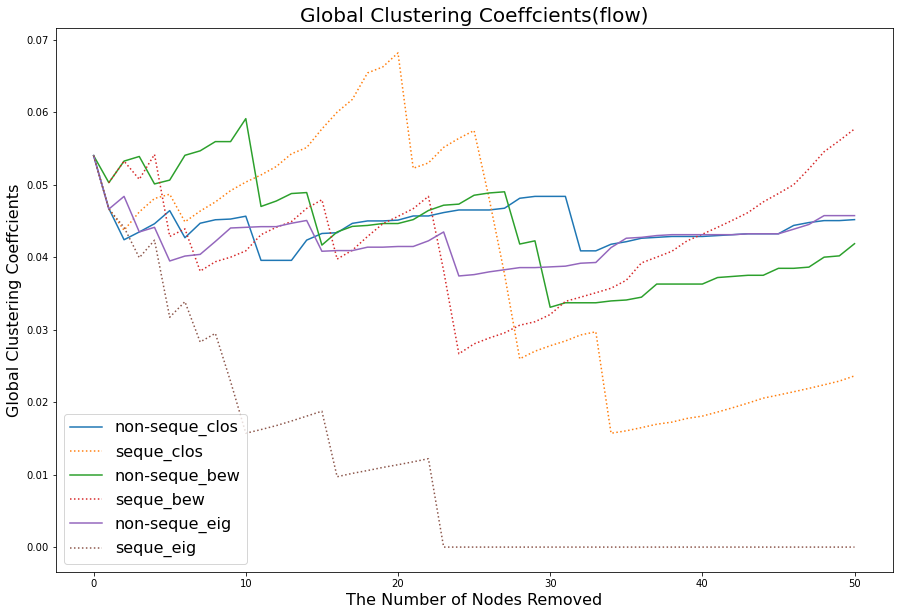

In [214]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# advisee度的折线图分布
plt.plot(Result2_final[Result2_final['strategy']=='unseque_clos'].step_k, Result2_final[Result2_final['strategy']=='unseque_clos'].c_global,label="non-seque_clos", linestyle="-")
plt.plot(Result2_final[Result2_final['strategy']=='seque_clos'].step_k, Result2_final[Result2_final['strategy']=='seque_clos'].c_global, label="seque_clos", linestyle=":")
   
plt.plot(Result2_final[Result2_final['strategy']=='unseque_bew'].step_k, Result2_final[Result2_final['strategy']=='unseque_bew'].c_global,label="non-seque_bew", linestyle="-")
plt.plot(Result2_final[Result2_final['strategy']=='seque_bew'].step_k, Result2_final[Result2_final['strategy']=='seque_bew'].c_global, label="seque_bew", linestyle=":")
   
plt.plot(Result2_final[Result2_final['strategy']=='unseque_eig'].step_k, Result2_final[Result2_final['strategy']=='unseque_eig'].c_global,label="non-seque_eig", linestyle="-")
plt.plot(Result2_final[Result2_final['strategy']=='seque_eig'].step_k, Result2_final[Result2_final['strategy']=='seque_eig'].c_global, label="seque_eig", linestyle=":")
   
   # advisor度的折线图分布
    #plt.plot(adsX, adsY, label="advisor度的分布", linestyle="-.")
plt.legend(fontsize=16)
plt.title("Global Clustering Coeffcients(flow)",fontsize=20)
plt.xlabel("The Number of Nodes Removed",fontsize=16)
plt.ylabel("Global Clustering Coeffcients",fontsize=16)
plt.savefig('Global Clustering Coeffcients(flow).png', dpi=300, transparent=True)
plt.show()


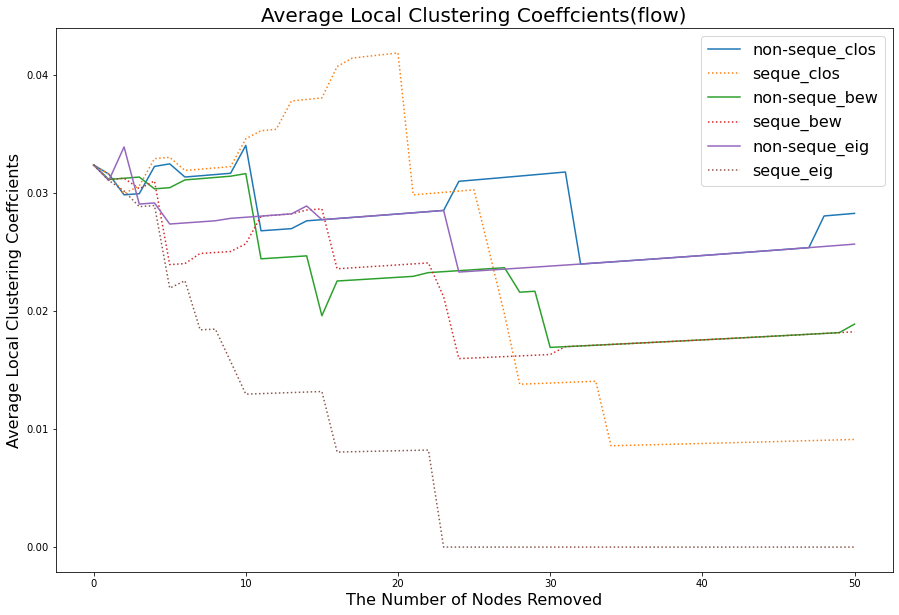

In [213]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# advisee度的折线图分布
plt.plot(Result2_final[Result2_final['strategy']=='unseque_clos'].step_k, Result2_final[Result2_final['strategy']=='unseque_clos'].c_local,label="non-seque_clos", linestyle="-")
plt.plot(Result2_final[Result2_final['strategy']=='seque_clos'].step_k, Result2_final[Result2_final['strategy']=='seque_clos'].c_local, label="seque_clos", linestyle=":")
   
plt.plot(Result2_final[Result2_final['strategy']=='unseque_bew'].step_k, Result2_final[Result2_final['strategy']=='unseque_bew'].c_local,label="non-seque_bew", linestyle="-")
plt.plot(Result2_final[Result2_final['strategy']=='seque_bew'].step_k, Result2_final[Result2_final['strategy']=='seque_bew'].c_local, label="seque_bew", linestyle=":")
   
plt.plot(Result2_final[Result2_final['strategy']=='unseque_eig'].step_k, Result2_final[Result2_final['strategy']=='unseque_eig'].c_local,label="non-seque_eig", linestyle="-")
plt.plot(Result2_final[Result2_final['strategy']=='seque_eig'].step_k, Result2_final[Result2_final['strategy']=='seque_eig'].c_local, label="seque_eig", linestyle=":")
   
   # advisor度的折线图分布
    #plt.plot(adsX, adsY, label="advisor度的分布", linestyle="-.")
plt.legend(fontsize=16)
plt.title("Average Local Clustering Coeffcients(flow)",fontsize=20)
plt.xlabel("The Number of Nodes Removed",fontsize=16)
plt.ylabel("Average Local Clustering Coeffcients",fontsize=16)
plt.savefig('Average Local Clustering Coeffcients_flow.png', dpi=300, transparent=True)
plt.show()
